In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy.linalg import eig, matrix_power
import networkx as nx
# import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import polars as pl


import warnings
warnings.filterwarnings('ignore')

In [ ]:
edges = pd.read_csv("edges.csv")
nodes = pd.read_csv("nodes.csv")
nodes = nodes.replace("Joey Bada$$", "Joey BadaSS")

<Axes: title={'center': "'Popularity' Frequencies"}, ylabel='Frequency'>

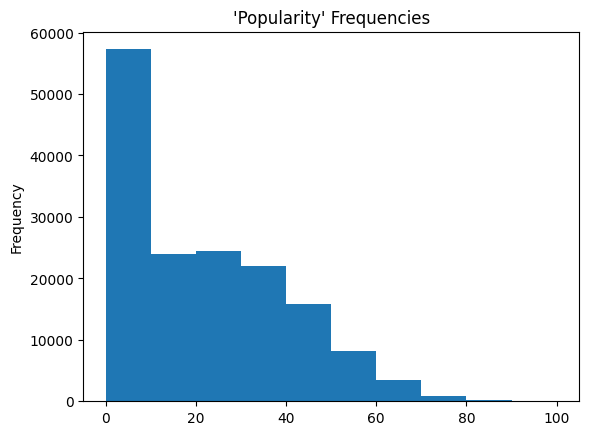

In [ ]:
nodes['popularity'].plot.hist(title = "'Popularity' Frequencies")

In [ ]:
nodes = nodes[['hip hop' in nodes['genres'][i] for i in range(len(nodes))]]
len(nodes)

8198

In [ ]:
nodes.sort_values(by='popularity', ascending=False)

,spotify_id,name,followers,popularity,genres,chart_hits
18726,3TVXtAsR1Inumwj472S9r4,Drake,66852536.0,95,"['canadian hip hop', 'canadian pop', 'hip hop'...","['us (190)', 'gb (163)', 'ar (18)', 'au (148)'..."
5486,7dGJo4pcD2V6oG8kP0tJRR,Eminem,59184634.0,90,"['detroit hip hop', 'hip hop', 'rap']","['us (78)', 'gb (72)', 'ar (7)', 'au (64)', 'a..."
273,5f7VJjfbwm532GiveGC0ZK,Lil Baby,11530234.0,89,"['atl hip hop', 'atl trap', 'rap', 'trap']","['us (62)', 'gb (16)', 'au (6)', 'at (3)', 'be..."
13163,1RyvyyTE3xzB2ZywiAwp0i,Future,12110689.0,88,"['atl hip hop', 'rap', 'southern hip hop', 'tr...","['us (158)', 'gb (21)', 'ar (2)', 'au (14)', '..."
8127,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,21389956.0,88,"['conscious hip hop', 'hip hop', 'rap', 'west ...","['us (65)', 'gb (62)', 'ar (2)', 'au (64)', 'a..."
...,...,...,...,...,...,...
13202,2kAV3K6hAe6yL64oAuhErV,Arvis Reiks,972.0,0,['latvian hip hop'],['lv (1)']
64180,6Z74QZHjlD0QkINELfpoLA,Baska,12.0,0,['zambian hip hop'],NaN
13368,6yVOW6faj7nSsf8K3BuWGA,ARmusicHIT,320.0,0,"['arabic hip hop', 'gulf hip hop']",['sa (1)']
64571,6jje7Uj5yEdbkrAdzAGNOh,高浩哲,178.0,0,['chinese hip hop'],NaN


In [ ]:
nodes = nodes[nodes['popularity'] >= 70]

In [ ]:
# Get an idea of how many artists there are above each popularity threshold
# for i in range(5):
  # nodes = nodes[nodes['popularity'] >= 50+10*i]
  # print(len(nodes))

10
10
10
10
10


In [ ]:
edges.head()

,id_0,id_1
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0


In [ ]:
nodes.head()

,spotify_id,name,followers,popularity,genres,chart_hits
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
6,71BhXa24Zf5zcikUb00l2N,Juice,11312.0,37,"['swedish drill', 'swedish hip hop', 'swedish ...",['se (4)']
8,7MFvm8pwjLdmVBZddGNiQH,VovaZiLvova,14619.0,43,"['ukrainian hip hop', 'ukrainian pop', 'ukrain...",['ua (1)']
19,6cd9X2t4HN8zjoxOblaDTz,Suur Papa,6752.0,29,"['estonian hip hop', 'estonian pop']",['ee (3)']
27,2sjnyyL9NXijL3Fr2eLikf,Aspova,339292.0,57,"['turkish hip hop', 'turkish trap pop']",['tr (12)']


In [ ]:
#Filter top artists only from nodes DataFrame (collaboration network)
# top_nodes = nodes[nodes['name'].isin(artists)]

nodes_id = list(nodes['spotify_id'])
nodes_name = list(nodes['name'])
n = len(nodes_id)
print(len(edges))#, len(nodes_name))
print(len(nodes_id), len(nodes_name))

300386
8198 8198


In [ ]:
d = {k: v for k, v in zip(nodes_id, nodes_name)}

In [ ]:
#Filter EdgeList DataFrame to include only edges between top artists
edges = edges[edges['id_0'].isin(nodes_id)]
edges = edges[edges['id_1'].isin(nodes_id)]

In [ ]:
#Add corresponding artist names into EdgeList DataFrame
edges['name0'] = edges['id_0'].apply(lambda x: d[x])
edges['name1'] = edges['id_1'].apply(lambda x: d[x])
edges.head(10)

,id_0,id_1,name0,name1
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD,Sick Luke,MACHETE
6,1bAftSH8umNcGZ0uyV7LMg,1vqR17Iv8VFdzure1TAXEq,Duki,LIT killah
27,0t6A5IoqSxQzxmMoDkS9Cv,2Z9KL8Zmqx5Sg3cd7Fldhl,Hemso,Olexesh
54,4DdkRBBYG6Yk9Ka8tdJ9BW,5yPzzu25VzEk8qrGTLIrE1,Offset,Young Nudy
62,0o3IFcCxiWfIb3kfnHkhPN,7oxIi3tF8bOBxAcSixbojj,HENSY,Dzharakhov
64,2QQcLziAzX1VdysI6Mvsl0,56hM6Y3Cw2g8xZOfZrHBuS,Moewgli,5iftyy
82,1bAftSH8umNcGZ0uyV7LMg,4QFG9KrGWEbr6hNA58CAqE,Duki,Aleman
87,1Irjtuam0m1mMHcvk5G5sD,2ic3GGGmkixOZP4qnakSA8,Fatbelly,alyona alyona
91,0ZOwmYD7AAgJd3b6jcyik8,5T9Q17uI3gmKMJiNs4CMQR,Vitya AK,Murovei
115,3CnCGFxXbOA8bAK54jR8js,3YwqjMyrRfuixi2pbgTGCE,Vald,Heuss L'enfoiré


In [ ]:
G = nx.from_pandas_edgelist(edges, 'name0', 'name1')

In [ ]:
degree_centrality = nx.degree_centrality(G)

#Finding the top 10 centrality measures
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_degree

[('Gucci Mane', 0.027669129364044618),
 ('Snoop Dogg', 0.022598870056497175),
 ('French Montana', 0.020425901781833983),
 ('The Game', 0.01912212081703607),
 ('Lil Wayne', 0.01796320440388237),
 ('T.I.', 0.01694915254237288),
 ('Ty Dolla $ign', 0.016659423439084456),
 ('Rick Ross', 0.016659423439084456),
 ('Future', 0.016659423439084456),
 ('DJ Drama', 0.01636969433579603)]

In [ ]:
pd.Series([top_10_degree[i][0] for i in range(10)], index = range(1,11))

,0
1,Gucci Mane
2,Snoop Dogg
3,French Montana
4,The Game
5,Lil Wayne
6,T.I.
7,Ty Dolla $ign
8,Rick Ross
9,Future
10,DJ Drama


In [ ]:
#Investigating Khalid's Radius 2 Ego Network to Identify Potential Collaborators
#Extracting the Khalid Ego Network
artist = "JAY-Z"
Khalid_egonet = nx.ego_graph(G, artist, radius=2)

#Identifying nodes at radius 1 and radius 2
nodes_radius_1 = set(nx.ego_graph(G, artist, radius=1).nodes()) - {artist}
nodes_radius_2 = set(Khalid_egonet.nodes()) - nodes_radius_1 - {artist}
radius_2_without_direct_connection = [
    node for node in nodes_radius_2 if not Khalid_egonet.has_edge(artist, node)
]

#Calculating degree centrality
degree_centrality = nx.degree_centrality(Khalid_egonet)

#Calculating node sizes by degree cnetrality
max_degree_centrality = max(degree_centrality.values())
node_sizes = {node: ((degree_centrality[node] / max_degree_centrality) * 1500) + 100 for node in Khalid_egonet.nodes()}
norm = plt.Normalize(vmin=min(degree_centrality.values()), vmax=max(degree_centrality.values()))
cmap = cm.viridis
node_colors_radius_2 = [cmap(norm(degree_centrality[node])) for node in radius_2_without_direct_connection]

shell_layout_nodes = [[artist], list(nodes_radius_1), list(radius_2_without_direct_connection)] #Using the Shell Layout for better visualization
pos = nx.shell_layout(Khalid_egonet, nlist=shell_layout_nodes)

plt.figure(figsize=(15, 10))
nx.draw(Khalid_egonet, pos, edge_color='gray', alpha=0.3, with_labels=False) #Setting edges to translucent
nx.draw_networkx_nodes(Khalid_egonet, pos, nodelist=nodes_radius_1, node_color='gray', node_size=[node_sizes[node] for node in nodes_radius_1])
nx.draw_networkx_nodes(Khalid_egonet, pos, nodelist=radius_2_without_direct_connection, node_color=node_colors_radius_2, node_size=[node_sizes[node] for node in radius_2_without_direct_connection])
nx.draw_networkx_nodes(Khalid_egonet, pos, nodelist=[artist], node_color='#f3b7c3', node_size=node_sizes[artist]*5)
nx.draw_networkx_labels(Khalid_egonet, pos, font_size=6)

plt.title("Khalid's Ego-Network with Radius 2 Collaborators", fontsize=18, fontweight='bold', color='#2b5472')
plt.show()

ValueError: 
LA$$A
  ^
ParseException: Expected end of text, found '$'  (at char 2), (line:1, col:3)

<Figure size 1500x1000 with 1 Axes>

In [ ]:
pagerank_scores = nx.pagerank(G, alpha=0.85)

In [ ]:
pagerank_sorted = dict(sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True))

In [ ]:
print("Top 20 nodes by PageRank:")
top20 = [i+1 for i in range(20)]
top_pagerank_nodes = []
pagerank_value = []

for i, (node, rank) in enumerate(pagerank_sorted.items()):
    top_pagerank_nodes.append(node)
    pagerank_value.append(rank)
    if i >= 19:
        break

Top 20 nodes by PageRank:


In [ ]:
top_pagerank_nodes[:10]

['Gucci Mane',
 'Snoop Dogg',
 'The Game',
 'French Montana',
 'Tech N9ne',
 'SFDK',
 'Lil Wayne',
 'T.I.',
 'DJ Drama',
 'Mozzy']

In [ ]:
pd.Series([top_pagerank_nodes[:10][i] for i in range(10)], index = range(1,11))

,0
1,Gucci Mane
2,Snoop Dogg
3,The Game
4,French Montana
5,Tech N9ne
6,SFDK
7,Lil Wayne
8,T.I.
9,DJ Drama
10,Mozzy


In [ ]:
bet_centrality = nx.betweenness_centrality(G)

In [ ]:
top_10_bet = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_bet

[('Snoop Dogg', 0.12186210605295406),
 ('The Game', 0.042270425482495086),
 ('Guè', 0.04055060099809602),
 ('Gucci Mane', 0.03753975544372591),
 ('Elastinen', 0.03488609120671034),
 ('Stress', 0.03357242826511863),
 ('Tyga', 0.03345512897890706),
 ('French Montana', 0.029613423971105744),
 ('Rick Ross', 0.029532907878483353),
 ('Fat Joe', 0.02911748558383766)]

In [ ]:
pd.Series([top_10_bet[:10][i][0] for i in range(10)], index = range(1,11))

,0
1,Snoop Dogg
2,The Game
3,Guè
4,Gucci Mane
5,Elastinen
6,Stress
7,Tyga
8,French Montana
9,Rick Ross
10,Fat Joe


In [ ]:
cls_centrality = nx.closeness_centrality(G)

In [ ]:
top_10_close = sorted(cls_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_close

[('Snoop Dogg', 0.28093687874305234),
 ('French Montana', 0.2724741574193959),
 ('The Game', 0.2717909560217231),
 ('Rick Ross', 0.2701475068678085),
 ('Gucci Mane', 0.2679470915466418),
 ('Tory Lanez', 0.2663389341052316),
 ('Tyga', 0.2635995207341923),
 ('Lil Wayne', 0.2627093002541412),
 ('Future', 0.26230285536720405),
 ('Guè', 0.26214686508728063)]

In [ ]:
pd.Series([top_10_close[:10][i] for i in range(10)], index = range(1,11))

,0
1,"(Snoop Dogg, 0.28093687874305234)"
2,"(French Montana, 0.2724741574193959)"
3,"(The Game, 0.2717909560217231)"
4,"(Rick Ross, 0.2701475068678085)"
5,"(Gucci Mane, 0.2679470915466418)"
6,"(Tory Lanez, 0.2663389341052316)"
7,"(Tyga, 0.2635995207341923)"
8,"(Lil Wayne, 0.2627093002541412)"
9,"(Future, 0.26230285536720405)"
10,"(Guè, 0.26214686508728063)"
